In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
x_train = np.loadtxt('input.csv', delimiter= ',')
y_train = np.loadtxt('labels.csv', delimiter= ',')

x_test = np.loadtxt('input_test.csv', delimiter= ',')
y_test = np.loadtxt('labels_test.csv', delimiter= ',')

In [3]:
x_train =x_train.reshape(len(x_train), 100, 100, 3)
y_train =y_train.reshape(len(y_train), 1)
x_test =x_test.reshape(len(x_test), 100, 100, 3)
y_test =y_test.reshape(len(y_test), 1)

x_train = x_train / 255
x_test = x_test /255

In [4]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 1)
shape of x_test: (400, 100, 100, 3)
shape of y_test: (400, 1)


In [5]:
x_train[1, :]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

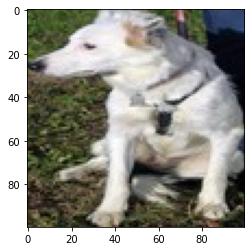

In [6]:
idx= random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation= 'sigmoid')
])

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dense(1, activation= 'sigmoid'))


In [9]:
#opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 [==============================] - 9s 247ms/step - loss: 0.7061 - accuracy: 0.5285
Epoch 2/5
32/32 [==============================] - 8s 245ms/step - loss: 0.6837 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 8s 258ms/step - loss: 0.6601 - accuracy: 0.6045
Epoch 4/5
32/32 [==============================] - 10s 307ms/step - loss: 0.6038 - accuracy: 0.6695
Epoch 5/5
32/32 [==============================] - 9s 285ms/step - loss: 0.5212 - accuracy: 0.7380


In [11]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 1s 28ms/step - loss: 0.6640 - accuracy: 0.6400


[0.6639624834060669, 0.6399999856948853]

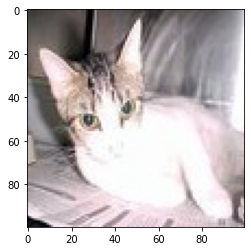

1/1 [==============================] - 0s 21ms/step
our model says it is a : cat


In [55]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print("our model says it is a :", pred)    

In [12]:
history.history??

Object `history.history` not found.


In [14]:
history=model.fit(x_train,y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
63/63 [==============================] - 7s 118ms/step - loss: 0.4921 - accuracy: 0.7620 - val_loss: 0.6434 - val_accuracy: 0.6600
Epoch 2/10
63/63 [==============================] - 7s 109ms/step - loss: 0.3831 - accuracy: 0.8295 - val_loss: 0.6648 - val_accuracy: 0.6350
Epoch 3/10
63/63 [==============================] - 7s 109ms/step - loss: 0.3149 - accuracy: 0.8640 - val_loss: 0.7592 - val_accuracy: 0.6350
Epoch 4/10
63/63 [==============================] - 7s 109ms/step - loss: 0.2349 - accuracy: 0.9075 - val_loss: 0.8380 - val_accuracy: 0.6550
Epoch 5/10
63/63 [==============================] - 7s 110ms/step - loss: 0.1627 - accuracy: 0.9460 - val_loss: 0.9186 - val_accuracy: 0.6725
Epoch 6/10
63/63 [==============================] - 7s 110ms/step - loss: 0.1184 - accuracy: 0.9595 - val_loss: 0.9843 - val_accuracy: 0.6475
Epoch 7/10
63/63 [==============================] - 7s 111ms/step - loss: 0.0829 - accuracy: 0.9740 - val_loss: 1.2427 - val_accuracy: 0.6350
Epoch 

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
accuracy=history.history['accuracy']
val_accuracy= history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

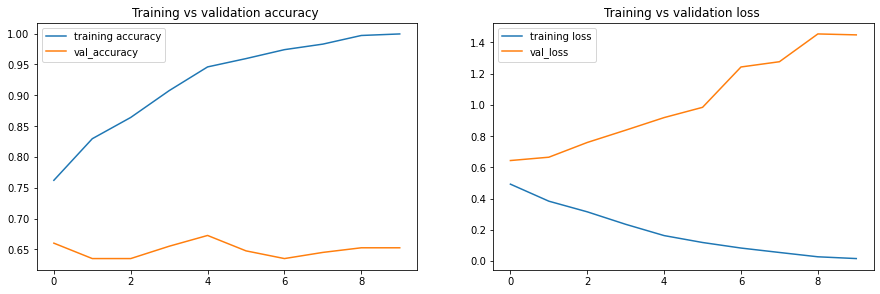

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(accuracy,label="training accuracy")
plt.plot(val_accuracy, label="val_accuracy")
plt.legend()
plt.title("Training vs validation accuracy ")

plt.subplot(2,2,2)
plt.plot(loss,label="training loss")
plt.plot(val_loss, label="val_loss")
plt.legend()
plt.title("Training vs validation loss ")
plt.show()